In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# GPU 설정

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# 데이터 불러오기

In [3]:
train  = pd.read_csv('../data/competition_data/train.csv')
test  = pd.read_csv('../data/competition_data/test.csv')

In [4]:
train.tail()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
14995,14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0
14999,14999,5.0,4.0,2.0,5.0,2.0,2.0,4.0,2.0,4.0,...,2.0,21,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1


In [5]:
test.tail()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD
35447,35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,...,2.0,2.0,16,3.0,10.0,4.0,2.0,1.0,3.0,2.0
35448,35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,...,3.0,1.0,16,3.0,2.0,5.0,2.0,1.0,2.0,2.0
35449,35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1.0,1.0,31,1.0,1.0,5.0,1.0,1.0,2.0,2.0
35450,35450,5.0,5.0,4.0,5.0,5.0,1.0,5.0,1.0,5.0,...,1.0,1.0,19,1.0,12.0,1.0,2.0,1.0,NaN,2.0
35451,35451,5.0,5.0,4.0,5.0,2.0,4.0,3.0,5.0,4.0,...,2.0,1.0,14,2.0,NaN,2.0,2.0,1.0,1.0,2.0


## NaN 값 처리

In [6]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

## 중복 제거 

In [7]:
train = train.drop(['index', 'country'],axis = 1)
test = test.drop(['index', 'country'],axis = 1)

train = train.drop_duplicates(keep='last')
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
5,5.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,...,1.0,26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
7,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,3.0,4.0,...,2.0,34,1.0,2.0,5.0,1.0,1.0,2.0,2.0,1
8,4.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,...,1.0,20,1.0,7.0,1.0,1.0,1.0,3.0,2.0,0
9,3.0,3.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,...,2.0,17,1.0,10.0,1.0,2.0,1.0,5.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


## 타입변환

In [8]:
# train['education']=train['education'].astype('str')
# test['education']=test['education'].astype('str')

# train['urban']=train['urban'].astype('str')
# test['urban']=test['urban'].astype('str')

# train['gender']=train['gender'].astype('str')
# test['gender']=test['gender'].astype('str')

# train['engnat']=train['engnat'].astype('str')
# test['engnat']=test['engnat'].astype('str')

# train['hand']=train['hand'].astype('str')
# test['hand']=test['hand'].astype('str')

# train['religion']=train['religion'].astype('str')
# test['religion']=test['religion'].astype('str')

# train['orientation'] = train['orientation'].astype('str')
# test['orientation'] = test['orientation'].astype('str')

# train['married']=train['married'].astype('str')
# test['married']=test['married'].astype('str')

## one-hot encoding

In [9]:
# train = pd.get_dummies(train, drop_first=True)
# test = pd.get_dummies(test, drop_first=True)

## Outlier 처리

In [10]:
# familysize
train['familysize'].fillna(0)
def change(x):
    if x==0:
        return train['familysize'].mean()
    else:
        return x
train['familysize'] = train['familysize'].apply(change)

# age
train = train[train['age']<130]

train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
5,5.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,...,1.0,26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
7,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,3.0,4.0,...,2.0,34,1.0,2.0,5.0,1.0,1.0,2.0,2.0,1
8,4.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,...,1.0,20,1.0,7.0,1.0,1.0,1.0,3.0,2.0,0
9,3.0,3.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,...,2.0,17,1.0,10.0,1.0,2.0,1.0,5.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


## train test split

In [11]:
X = train.drop(['nerdiness'], axis=1)
y = train['nerdiness']

In [12]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.1, random_state=0)

In [13]:
print(train_X.shape)
print(train_y.shape)
print(val_X.shape)
print(val_y.shape)

(11469, 67)
(11469,)
(1275, 67)
(1275,)


## Scaler

In [14]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
train_X = standard_scaler.fit_transform(train_X)
val_X = standard_scaler.fit_transform(val_X)
test = standard_scaler.fit_transform(test)
train_X

array([[-2.72642639, -0.05379949, -0.21523567, ...,  1.7784463 ,
        -0.06637434,  0.25468696],
       [ 0.02461152,  0.80142097, -0.21523567, ...,  1.7784463 ,
        -0.02969668,  0.25468696],
       [ 0.94162416,  0.80142097,  0.76114869, ..., -0.38576857,
         0.00698097,  0.25468696],
       ...,
       [ 0.94162416,  0.80142097, -1.19162002, ..., -0.38576857,
        -0.02969668,  0.25468696],
       [ 0.02461152,  0.80142097, -0.21523567, ..., -0.38576857,
        -0.02969668,  0.25468696],
       [ 0.94162416,  0.80142097,  0.76114869, ..., -0.38576857,
         0.04365862,  0.25468696]])

In [15]:
# from sklearn.preprocessing import MinMaxScaler

# minmax_scaler = MinMaxScaler()
# train_X = minmax_scaler.fit_transform(train_X)
# val_X = minmax_scaler.fit_transform(val_X)
# test = minmax_scaler.fit_transform(test)
# train_X

# 모델링

In [16]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(random_state=0)
# model.fit(train_X, train_y)
# pred_proba = model.predict_proba(val_X)
# pred_proba

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, random_state=0)
model.fit(train_X, train_y)
pred_proba = model.predict_proba(val_X)
pred_proba

array([[0.543, 0.457],
       [0.539, 0.461],
       [0.663, 0.337],
       ...,
       [0.31 , 0.69 ],
       [0.537, 0.463],
       [0.534, 0.466]])

In [18]:
# # !pip install xgboost
# from xgboost import XGBClassifier

# model = XGBClassifier()
# model.fit(train_X, train_y)
# pred_proba = model.predict_proba(val_X)
# pred_proba

## ROC curve

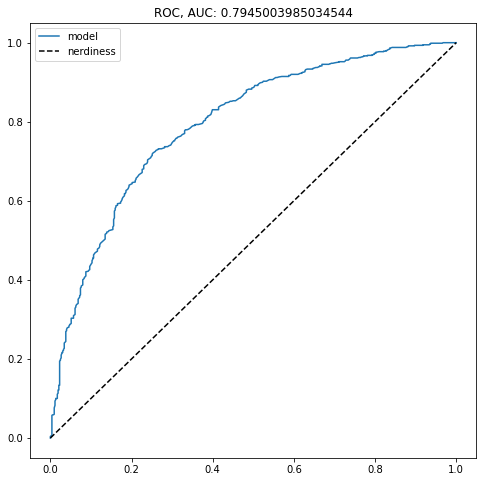

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

pred_proba = model.predict_proba(val_X)[:, 1]
fpr, tpr, thresholds = roc_curve(val_y, pred_proba)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label = "model")
plt.plot([0,1], [0,1], 'k--', label = 'nerdiness')
plt.title("ROC, AUC: " + str(roc_auc_score(val_y, pred_proba)))
plt.legend()
plt.show()

## submission 파일 (제출 파일) 만들기

In [20]:
submission = pd.read_csv('../data/competition_data/sample_submission.csv')
submission

,index,nerdiness
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1
...,...,...
35447,35447,-1
35448,35448,-1
35449,35449,-1
35450,35450,-1


In [21]:
pred = model.predict(test)
submission["nerdiness"] = pred

In [22]:
submission

,index,nerdiness
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
35447,35447,1
35448,35448,1
35449,35449,1
35450,35450,0


In [23]:
submission.to_csv("./result.csv", index = False)